# Memory task initial data exploration
## Matt Oberhardt



### Imports & API calls:

In [1]:
import synapseclient
from synapseclient import Project, Folder, File
import pandas as pd
import json
import pickle
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import os
%load_ext autoreload
%matplotlib inline  
# from pandas import DataFrame, Series
np.set_printoptions(threshold='nan') # so that i can print as many lines as i want


In [2]:
import memorytools as mt

### Load up the memory & demographic data:

In [3]:
# initialize environment:
synuser = os.environ['SYNAPSE_USER']
synpass = os.environ['SYNAPSE_PASS']
mt.loadSynapseRecordsFromScratch = False
syn, memory, memorysyn, filePaths, demographics, demosyn, data = mt.create_memory_environment(synuser, synpass)
data = mt.filter_data_for_popular_phones(data)


Welcome, Matthew Oberhardt!
(phones are now filtered for only the most popular ones)


In [4]:
# pull out features from games:
fromFile = True#False
toSave = False#True
data = mt.add_memory_game_features_to_data(filePaths, data, fromFile = fromFile, toSave=toSave, outFileName='memory_data_with_features.p')


memory features loaded from file: memory_data_with_features.p (input data was ignored)


### Visualize the memory data:

#### Columns:

In [5]:
# columns:
for col in data.columns:
    print col

recordId
healthCode
createdOn
appVersion
phoneInfo
game_score
game_numGames
game_numFails
game_startDate
game_endDate
game_records
medTimepoint
game_records_txt
recordId_demographic
createdOn_demographic
appVersion_demographic
phoneInfo_demographic
age
isCaretaker
brainStim
diagYear
education
employment
gender
healthHistory
healthcareProvider
homeUsage
lastSmoked
maritalStatus
medicalUsage
medicalUsageYesterday
medicationStartYear
onsetYear
packsPerDay
pastParticipation
phoneUsage
professionalDiagnosis
race
smartphone
smoked
surgery
videoUsage
yearsSmoking
hasParkinsons
gamesdata
16_latency
16_gamescore
16_successful
16_meanDt
16_meandist
16_gamesize
16_meanunsuccessfuldist
16_meansuccessfuldist
16_numunsuccesses
16_numsuccesses
16_firstdist
9_latency
9_gamescore
9_successful
9_meanDt
9_meandist
9_gamesize
9_meanunsuccessfuldist
9_meansuccessfuldist
9_numunsuccesses
9_numsuccesses
9_firstdist
4_latency
4_gamescore
4_successful
4_meanDt
4_meandist
4_gamesize
4_meanunsuccessfuldist
4_mea

In [6]:
# How many nans in each column?
mt.display_num_nulls_per_column(data)



Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

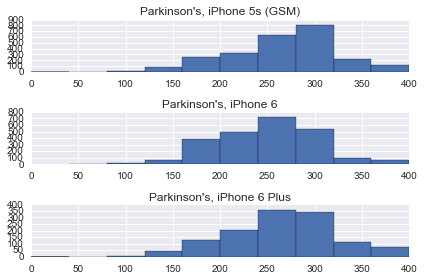

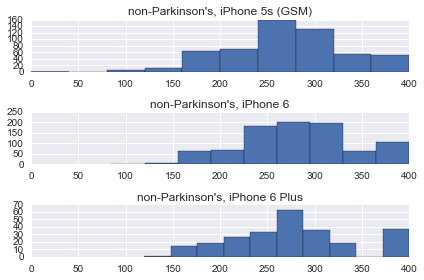

In [7]:
# compare these for parkinson's and non-parkinson's
# do on same plot too

# todo check if the scores are different, within parkinson's category, for phone type!

byphonePark = data[data.hasParkinsons==True].groupby('phoneInfo')
byphonenonPark = data[data.hasParkinsons==False].groupby('phoneInfo')

grouped = byphonePark
plt.figure()
numphones = len(grouped)
allphones = grouped.phoneInfo.unique()
for n, phone in enumerate(allphones):
    plt.subplot(len(allphones),1,n+1)
    data.game_score[grouped.groups[phone[0]]].hist()
    plt.title("Parkinson's, %s" % phone[0])
plt.tight_layout()

grouped = byphonenonPark
plt.figure()
numphones = len(grouped)
allphones = grouped.phoneInfo.unique()
for n, phone in enumerate(allphones):
    a = plt.subplot(len(allphones),1,n+1)
    data.game_score[grouped.groups[phone[0]]].hist()
    plt.title("non-Parkinson's, %s" % phone[0])
    a.set_xlim([0,400])
plt.tight_layout()

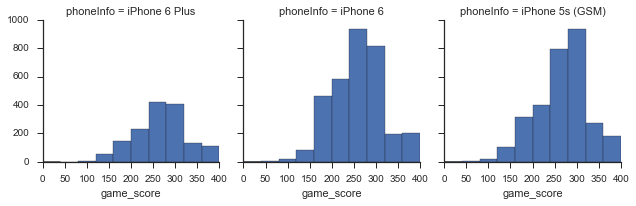

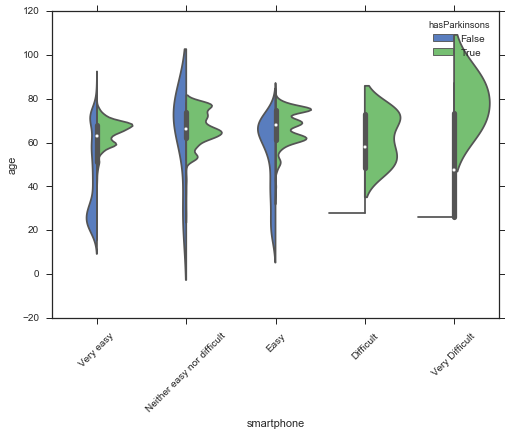

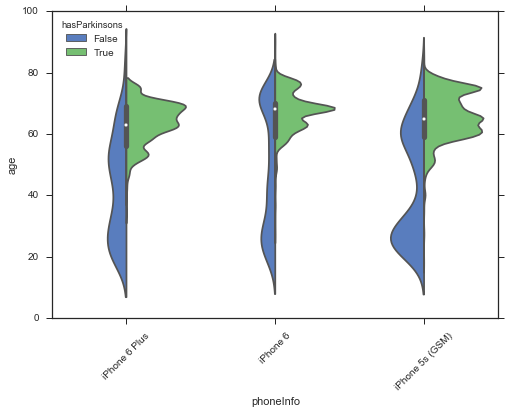

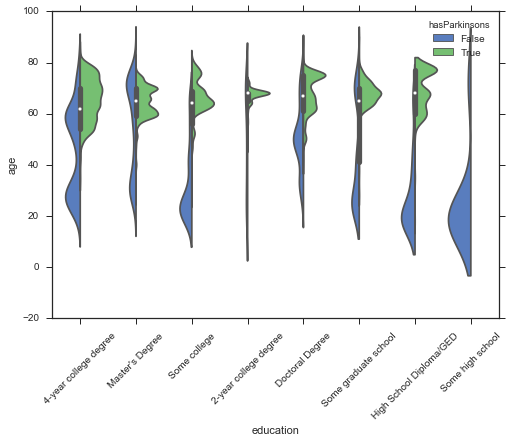

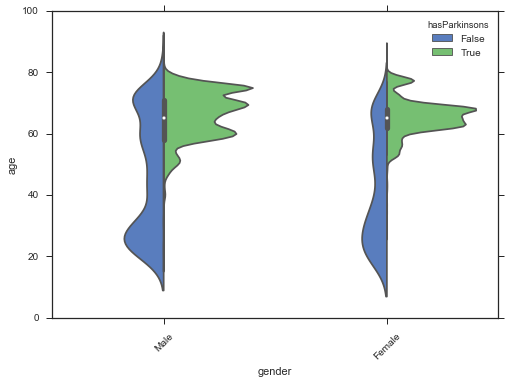

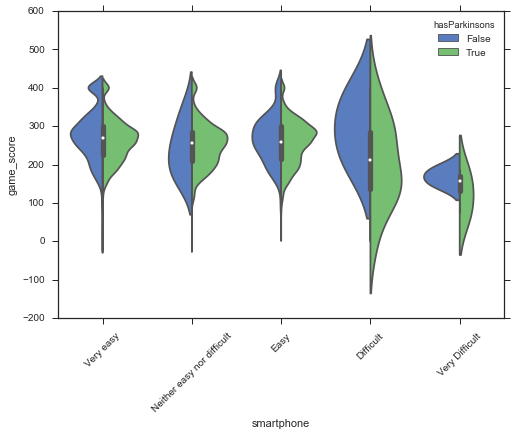

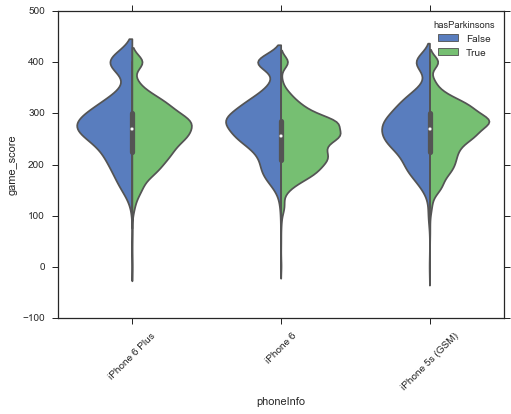

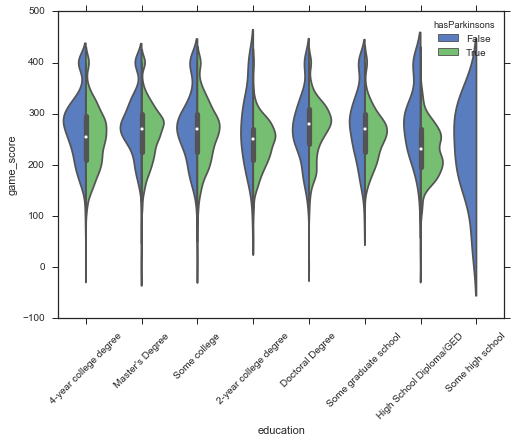

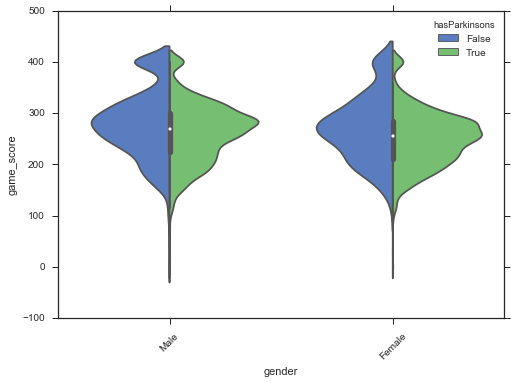

In [8]:
sns.set(style="ticks", color_codes=True)

features_to_check_against_Parkinsons = ["game_score","age",
        "game_numFails", "phoneInfo", "education", "gender", 
        "phoneUsage", "smartphone"]
            
otherfeatures =  ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']
#ax1 = sns.violinplot(x="phoneInfo", y="game_score", hue="hasParkinsons", data=data, palette="muted")#, split=True)    
#ax2 = sns.violinplot( y="game_score", hue="hasParkinsons", data=data, palette="muted", split=True)    

#features_to_check = ['phoneInfo, BLAST']
g = sns.FacetGrid(data, col="phoneInfo")
g = g.map(plt.hist, "game_score")

yvar = 'hasParkinsons'
catvars = ['smartphone', 'phoneInfo', 'education', 'gender']
freqvars = ['age', 'game_score']

for freqvar in freqvars:
    for catvar in catvars:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=data, palette="muted", split=True)    
        plt.xticks(rotation=45)



Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']


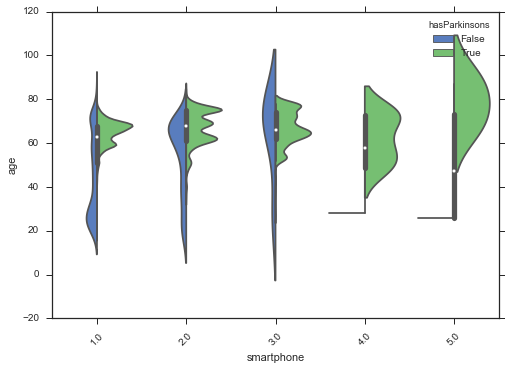

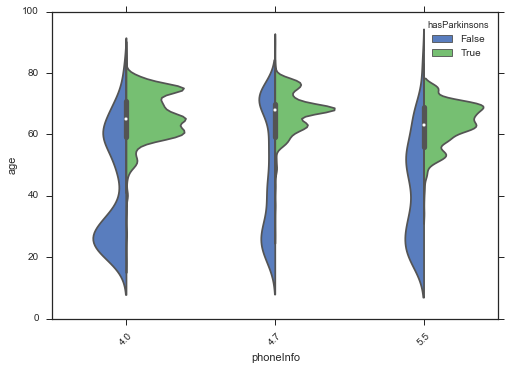

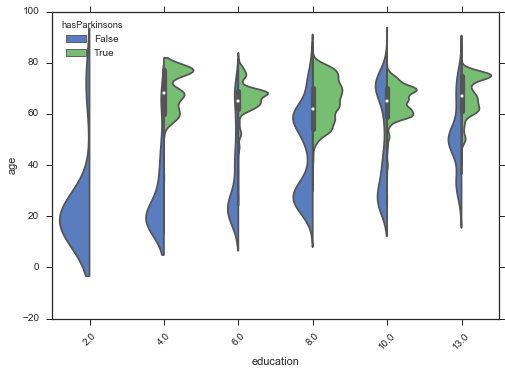

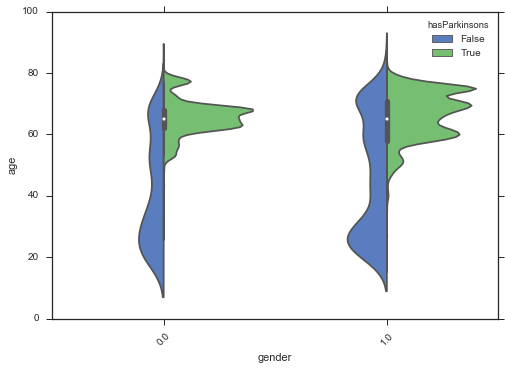

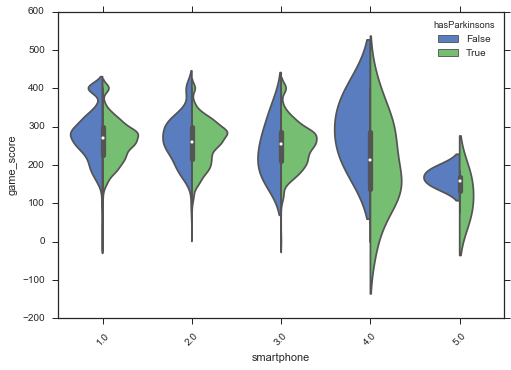

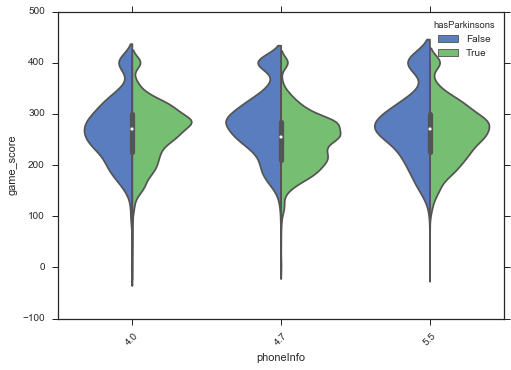

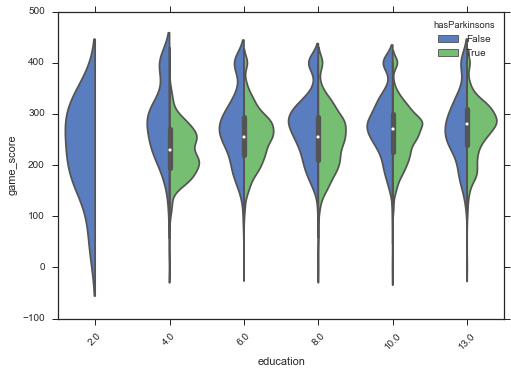

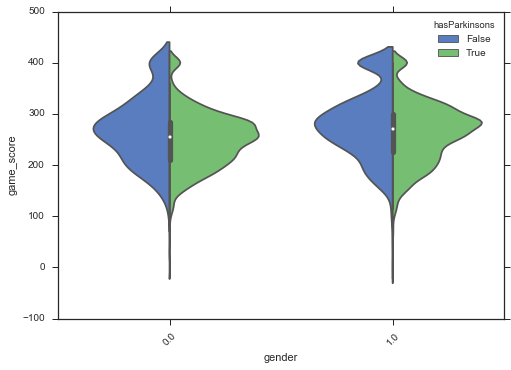

In [9]:
# revisualize after turning categorical-ordered into #'s:
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]
features_df = mt.convert_features_to_numbers(features_df)

yvar = 'hasParkinsons'
catvars = ['smartphone', 'phoneInfo', 'education', 'gender']
freqvars = ['age', 'game_score']

for freqvar in freqvars:
    for catvar in catvars:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=features_df, palette="muted", split=True)    
        plt.xticks(rotation=45)

        

## Troubleshoot the features from the game:

In [10]:
#data[['16_meansuccessfuldist','16_meanunsuccessfuldist']]

In [11]:
### look at one record where meansuccessfuldist > meanunsuccessfuldist -- that is wierd (might be a bug)
#rowidx = 7944
#print data['recordId'][rowidx]
#games = data['gamesdata'][rowidx]['games_by_sizes']
#games
##data['recordId'][rowidx]
## problem here... 

In [12]:
#games16 = games[16]
#avg_memory_features = mt.average_features_from_memory_games(games16)
#
##memory_features = mt.pull_features_from_memory_game(game)
##memory_features

#avg_memory_features
### It seems that the MemoryGameTouchSampleIsCorrect field is WRONG here!?, for the 1st result from game 16.

# Machine learning

### Imports & API calls:

In [13]:
from sklearn import linear_model
import sklearn
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import numpy as np
from sklearn.utils.validation import check_consistent_length, _num_samples
import sklearn.preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Pick & process features, 1st logistic regression:

In [14]:
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()
#print lr.score
# tp / (tp + fn)

# look at sklearn.metrics

pass


Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.888564654386
test accuracy: 0.881327094853


phoneUsage      -0.726648
gender          -0.535846
education       -0.091916
game_score       0.030728
game_numFails    0.104056
phoneInfo        0.126661
age              1.523501
smartphone       1.527187
dtype: float64


### Try logistic regression, inputting the hasParkinsons column as a feature
#### (should give perfect prediction)

In [15]:

##### define features:
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]
features_df['hasParkinsons2'] = data['hasParkinsons']

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 1.0
test accuracy: 1.0


phoneUsage       -0.116390
gender           -0.104257
game_score       -0.069913
education         0.006747
game_numFails     0.077573
phoneInfo         0.096486
smartphone        0.187908
age               0.625051
hasParkinsons2    9.381030
dtype: float64


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### that works well. good.

### Add memory features to model, & redo logistic regression

In [16]:
# How many nans in each column?
numnulls = data.isnull().sum()
pd.set_option('display.max_rows', len(numnulls))
numnulls.sort_values(inplace=True, ascending=True)
print 'Number of nulls per column:\n'
print numnulls

Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

In [17]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist', '9_meanDt']
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features = gamefeatures + features
#features = gamefeatures + ['game_score', 'hasParkinsons']

In [18]:
# transform features, etc.
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.896513962402
test accuracy: 0.896126011069


9_gamescore        -1.019761
9_latency          -0.690115
gender             -0.675142
phoneUsage         -0.548219
education          -0.182102
game_score         -0.131353
game_numFails      -0.068393
9_gamesize          0.000000
9_firstdist         0.123148
phoneInfo           0.243323
9_numsuccesses      0.517643
9_meandist          0.671323
9_numunsuccesses    1.040649
age                 1.212418
smartphone          1.311676
9_meanDt            1.381738
9_successful        1.469330
dtype: float64


#### Barely affects results...

### Remove features until the model fails

In [19]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist', '9_meanDt']
#features = ["game_score","age","game_numFails", "phoneInfo","education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]

#features = gamefeatures + features
features = gamefeatures + ['game_score', 'hasParkinsons']
features.remove('9_successful')
features.remove('9_numunsuccesses')
features.remove('game_score')
features.remove('9_firstdist')
features.remove('9_meandist')
features.remove('9_latency')
features.remove('9_gamescore')
features.remove('9_numsuccesses')

features = ['gender', 'hasParkinsons']

features


['gender', 'hasParkinsons']

In [20]:
# transform features, etc.
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

Features converted to numbers:

['gender']
training accuracy: 0.786494357481
test accuracy: 0.782590233546


gender   -0.511951
dtype: float64


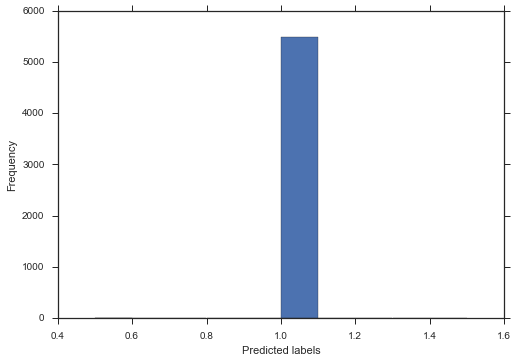

{True}

In [21]:
# look at predictions from model (are they all ones?):
predicted = lr.predict(X_train_std)
plt.hist(predicted)

plt.xlabel('Predicted labels')
plt.ylabel('Frequency')
plt.show()
#predicted.__class__

set(predicted)

# model is outputting all ones...###



### Visualize my features


In [22]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons", '9_meanDt']
features = gamefeatures + features
features

['9_numsuccesses',
 '9_numunsuccesses',
 '9_gamesize',
 '9_meandist',
 '9_successful',
 '9_gamescore',
 '9_latency',
 '9_firstdist',
 'game_score',
 'age',
 'game_numFails',
 'phoneInfo',
 'education',
 'gender',
 'phoneUsage',
 'smartphone',
 'hasParkinsons',
 '9_meanDt']

In [23]:
data['smartphone'].unique()

array(['Very easy', 'Neither easy nor difficult', 'Easy', 'Difficult',
       'Very Difficult', nan], dtype=object)

In [24]:
# How many nans in each column?
mt.display_num_nulls_per_column(data)

Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

### Try Random Forest:

In [25]:
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)       

# create model:
mod = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod.fit(X_train, y_train)

###### assess performance:
mod.fit(X_train, y_train)
print 'training accuracy:', mod.score(X_train, y_train)
print 'test accuracy:', mod.score(X_test, y_test) 
mat = mod.predict_proba(X_test)
#print mat[:,:5]
print mat.__class__
# coveariance?

# WORKS!!!!!!!

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.999452854277
test accuracy: 0.97830710336
<type 'numpy.ndarray'>


#### Assess performance

[[ 466   25]
 [  26 1834]]
1860
1859


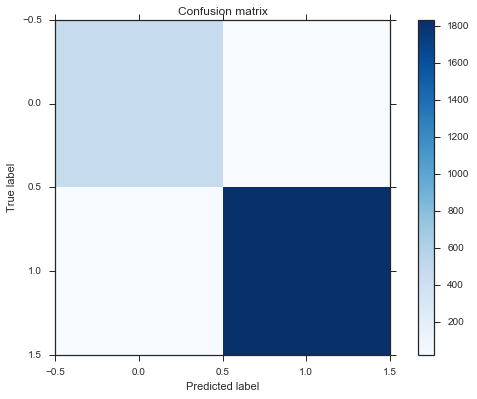

In [26]:
###### get predictions:
y_pred = mod.predict(X_test)
[y_test, y_pred]
sklearn.metrics.roc_auc_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print cm
print sum(y_test)
print sum(y_pred)
sum(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#    tick_marks = np.arange(len(iris.target_names))
#    plt.xticks(tick_marks, iris.target_names, rotation=45)
#    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#plot_confusion_matrix(cm_normalized)
plot_confusion_matrix(cm)

In [27]:
# which features matter?
fi = mod.feature_importances_
fi.__class__
S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()



game_numFails    0.013031
phoneUsage       0.024981
gender           0.045157
game_score       0.065758
education        0.066019
phoneInfo        0.072831
smartphone       0.129977
age              0.582246
Name: feature importances, dtype: float64


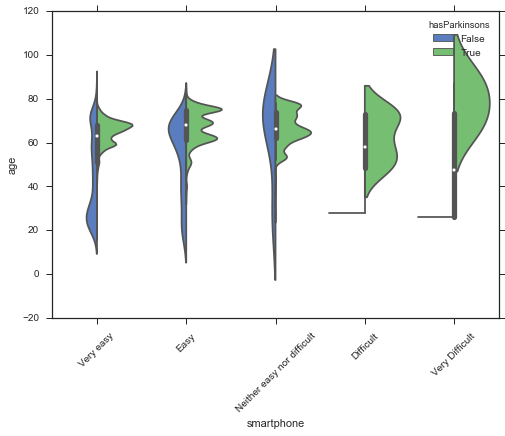

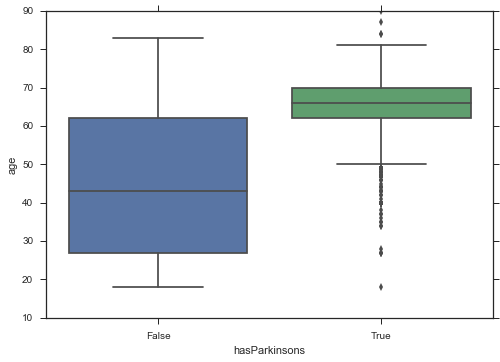

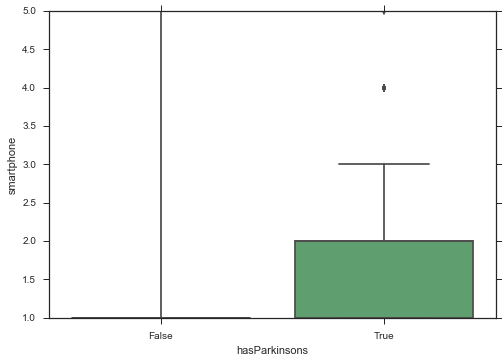

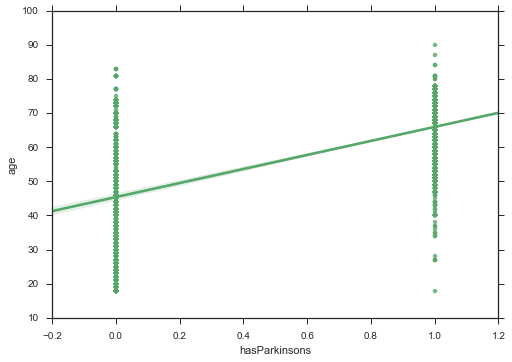

In [28]:
yvar = 'hasParkinsons'
catvar = 'smartphone'#, 'phoneInfo', 'education', 'gender']
freqvar = 'age'#, 'game_score']


order = ['Very easy', 'Easy','Neither easy nor difficult' , 'Difficult','Very Difficult']

#order = 
plt.figure()
ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=data, palette="muted", split=True, order=order)    
plt.xticks(rotation=45)


plt.figure()
ax = sns.boxplot(x="hasParkinsons", y="age", data=data)
plt.figure()
ax = sns.boxplot(x='hasParkinsons', y='smartphone', data=features_df)
plt.figure()
ax = sns.regplot(x=data['hasParkinsons'], y=data['age'], color="g")


In [29]:
# age is a confound - remove it & try again..?
# do simple regression to figure out the parkinsons corrected for age...?


In [30]:
# Do analysis per person 

['game_score', 'age', 'game_numFails', 'phoneInfo', 'education', 'gender', 'phoneUsage', 'smartphone', 'hasParkinsons']
[400, 90.0, 4, 'iPhone 6 Plus', 'Some high school', 'Male', 'true', 'Very easy', True]
400.0


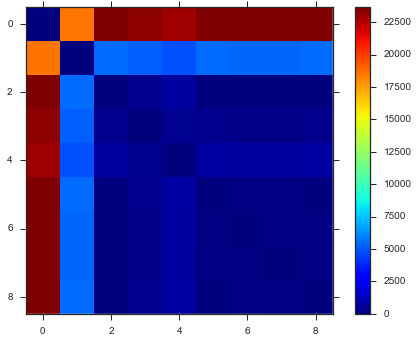

In [31]:
# distance matrix of X matrix (and y-column in there too):
import scipy.spatial.distance as dist
Xy = np.hstack((X, y.reshape(len(y),1)))
dd = dist.pdist(Xy.T, 'euclidean')
dd = dist.squareform(dd)
plt.imshow(dd, interpolation='none', cmap='jet')
plt.colorbar()

print features
print [data[f].max() for f in features]
print Xy.max()


In [32]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features.remove('age')
#features.remove('smartphone')
#features.remove('education')
#features.remove('gender')
#features.remove('phoneUsage')
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.908213440175
test accuracy: 0.866610025489
game_numFails    0.032260
phoneUsage       0.060267
gender           0.085662
phoneInfo        0.123495
education        0.174865
game_score       0.255878
smartphone       0.267571
Name: feature importances, dtype: float64


In [33]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features.remove('age')
features.remove('smartphone')
#features.remove('education')
#features.remove('gender')
#features.remove('phoneUsage')
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'education', 'phoneInfo']
training accuracy: 0.85849572027
test accuracy: 0.807136788445
game_numFails    0.047708
phoneUsage       0.082391
gender           0.086238
phoneInfo        0.155795
education        0.254739
game_score       0.373128
Name: feature importances, dtype: float64


[[ 212  260]
 [ 194 1688]]
1882
1948


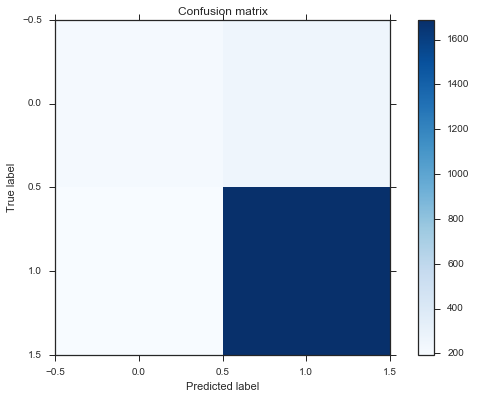

In [34]:
#  Confusion matrix:
#plot WWTF?@!
###### get predictions:
y_pred = mod2.predict(X_test)
[y_test, y_pred]
sklearn.metrics.roc_auc_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print cm
print sum(y_test)
print sum(y_pred)
sum(cm)
plot_confusion_matrix(cm)

#monkey


In [35]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:
gamefeatures =  ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist', '9_meanDt']

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features.remove('age')
features.remove('smartphone')
features = features + gamefeatures
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'education', 'phoneInfo']
training accuracy: 1.0
test accuracy: 0.882653061224
9_gamesize          0.000000
9_numunsuccesses    0.005637
9_successful        0.006363
9_numsuccesses      0.015176
9_gamescore         0.016060
game_numFails       0.021876
phoneUsage          0.026498
gender              0.049431
phoneInfo           0.057228
education           0.073435
game_score          0.073800
9_firstdist         0.105809
9_latency           0.124211
9_meandist          0.124528
9_meanDt            0.299949
Name: feature importances, dtype: float64


In [36]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:
features = ['hasParkinsons', '9_latency', '9_meandist', '9_firstdist','game_score','education', '9_meanDt']
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['education']
training accuracy: 1.0
test accuracy: 0.825680272109
education      0.061858
game_score     0.106918
9_firstdist    0.147013
9_latency      0.156514
9_meandist     0.165460
9_meanDt       0.362236
Name: feature importances, dtype: float64


In [37]:
#

In [38]:
# LOOK AT INDIVIDUALS, TAKING MEDICINE VS NOT.

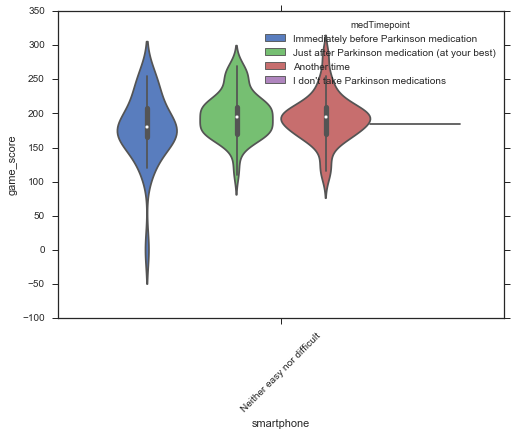

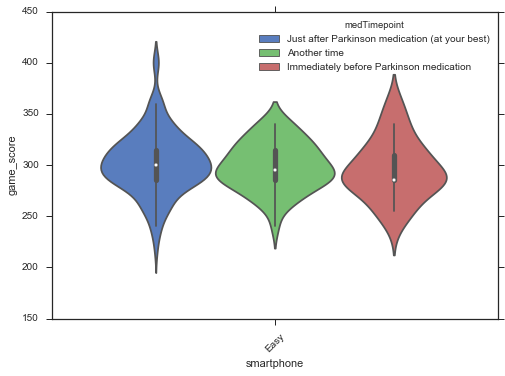

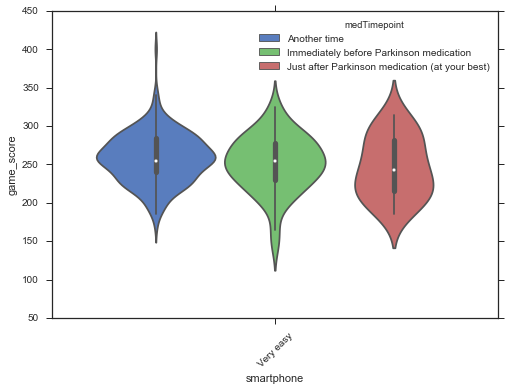

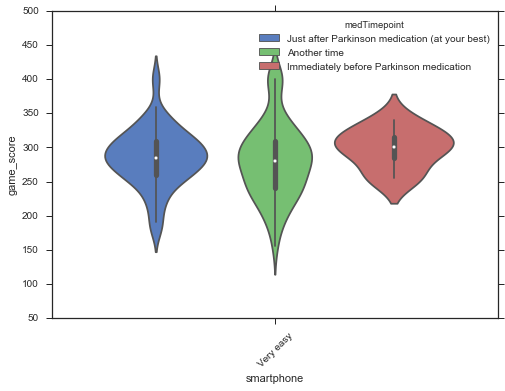

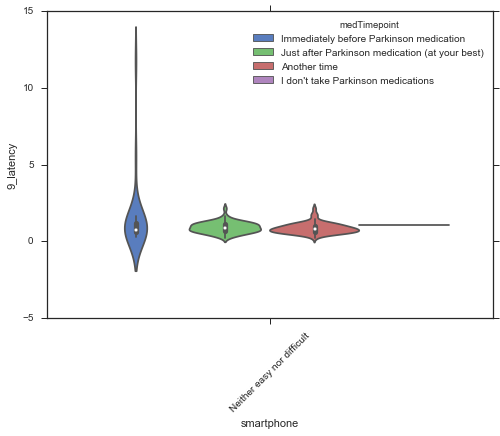

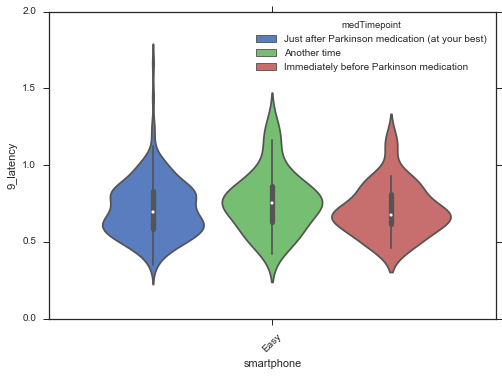

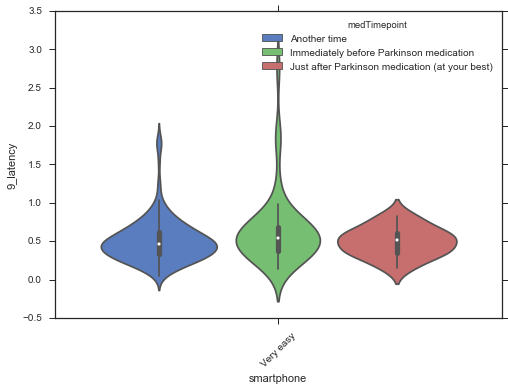

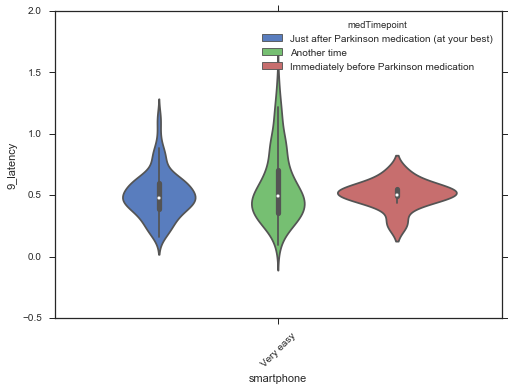

In [39]:
#individuals = data.groupby('healthCode')
individuals = data.loc[data['hasParkinsons']==True].groupby('healthCode')

#yvar = 'hasParkinsons'
#catvars = ['smartphone', 'phoneInfo', 'education', 'gender']
#freqvars = ['age', 'game_score']
yvar = 'medTimepoint'
catvar = 'smartphone'
freqvar = 'game_score'
for id, df in individuals:
    if len(df) > 150:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=df, palette="muted")#, split=True)    
        plt.xticks(rotation=45)

yvar = 'medTimepoint'
catvar = 'smartphone'
freqvar = '9_latency'
for id, df in individuals:
    if len(df) > 150:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=df, palette="muted")#, split=True)    
        plt.xticks(rotation=45)



        
        
    

In [40]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:
gamefeatures =  ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist', '9_meanDt']

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]

features = gamefeatures + features
features.remove('9_numunsuccesses')
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 1.0
test accuracy: 0.965942954449
9_gamesize        0.000000
9_successful      0.003080
9_numsuccesses    0.006782
9_gamescore       0.006857
game_numFails     0.010463
phoneUsage        0.015975
gender            0.031751
game_score        0.033169
education         0.036948
9_firstdist       0.043766
phoneInfo         0.046629
9_meandist        0.052919
9_latency         0.052974
smartphone        0.096715
9_meanDt          0.136181
age               0.425792
Name: feature importances, dtype: float64


['9_numsuccesses', '9_gamesize', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', 'game_score', 'age', 'game_numFails', 'phoneInfo', 'education', 'gender', 'phoneUsage', 'smartphone', 'hasParkinsons']
[3.6666666666666665, 9.0, 206.77473014123353, 1.0, 82.5, 11.75321187500958, 204.88106305854623, 2.6244784392341298, 400, 90.0, 4, 'iPhone 6 Plus', 'Some high school', 'Male', 'true', 'Very easy', True]
400.0


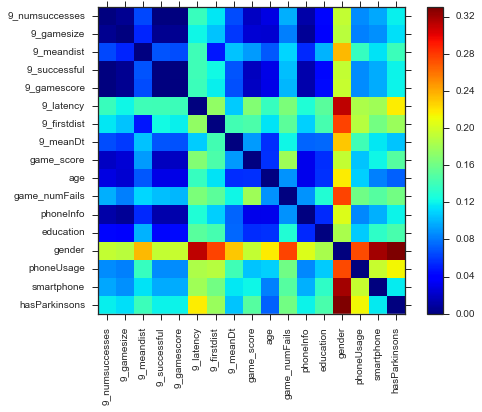

In [41]:
# distance matrix of X matrix (and y-column in there too):
import scipy.spatial.distance as dist


Xy = np.hstack((X, y.reshape(len(y),1)))
dd = dist.pdist(Xy.T, 'cosine')
dd = dist.squareform(dd)
plt.imshow(dd, interpolation='none', cmap='jet')
plt.colorbar()
plt.xticks(rotation=45)
plt.yticks(range(len(features)), features)#, rotation='vertical')
plt.xticks(range(len(features)), features, rotation='vertical')
print features
print [data[f].max() for f in features]
print Xy.max()



In [42]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:
gamefeatures =  ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist', '9_meanDt',
                '16_numsuccesses', '16_numunsuccesses',
                '16_gamesize', '16_meandist', '16_successful',
                '16_gamescore', '16_latency', '16_firstdist', '16_meanDt']

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]

features = gamefeatures + features
features.remove('9_numunsuccesses')
features.remove('16_numunsuccesses')
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  
print 'There are now %s samples, after filtering nas' % len(y)

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
There are now 7551 samples, after filtering nas
training accuracy: 1.0
test accuracy: 0.946160635481
9_gamesize         0.000000
16_gamesize        0.000000
9_successful       0.002096
game_numFails      0.004567
9_numsuccesses     0.004820
9_gamescore        0.005012
16_successful      0.007455
phoneUsage         0.011038
16_numsuccesses    0.018023
game_score         0.018379
16_gamescore       0.019167
gender             0.022442
9_firstdist        0.027389
education          0.028043
phoneInfo          0.030028
16_firstdist       0.031023
9_meandist         0.037247
16_latency         0.037265
9_latency          0.037674
16_meandist        0.042584
smartphone         0.092632
16_meanDt          0.103626
9_meanDt           0.107267
age                0.312222
Name: feature importances, dtype: float64


['9_numsuccesses', '9_gamesize', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '16_numsuccesses', '16_gamesize', '16_meandist', '16_successful', '16_gamescore', '16_latency', '16_firstdist', '16_meanDt', 'game_score', 'age', 'game_numFails', 'phoneInfo', 'education', 'gender', 'phoneUsage', 'smartphone', 'hasParkinsons']
[3.6666666666666665, 9.0, 206.77473014123353, 1.0, 82.5, 11.75321187500958, 204.88106305854623, 2.6244784392341298, 6.0, 16.0, 109.90672012692281, 1.0, 137.5, 16.05716520833084, 303.9111712326482, 6.5116739791628797, 400, 90.0, 4, 'iPhone 6 Plus', 'Some high school', 'Male', 'true', 'Very easy', True]
400.0


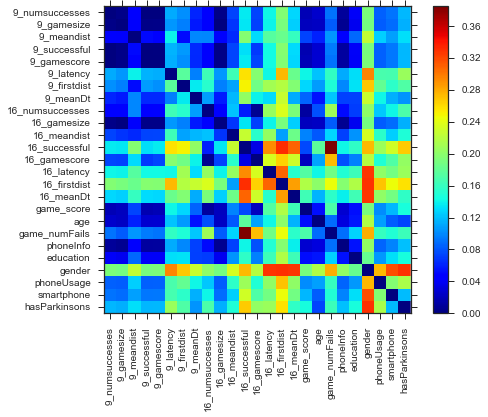

In [43]:
# distance matrix of X matrix (and y-column in there too):
import scipy.spatial.distance as dist


Xy = np.hstack((X, y.reshape(len(y),1)))
dd = dist.pdist(Xy.T, 'cosine')
dd = dist.squareform(dd)
plt.imshow(dd, interpolation='none', cmap='jet')
plt.colorbar()
plt.xticks(rotation=45)
plt.yticks(range(len(features)), features)#, rotation='vertical')
plt.xticks(range(len(features)), features, rotation='vertical')
print features
print [data[f].max() for f in features]

print Xy.max()

Features converted to numbers:

[]


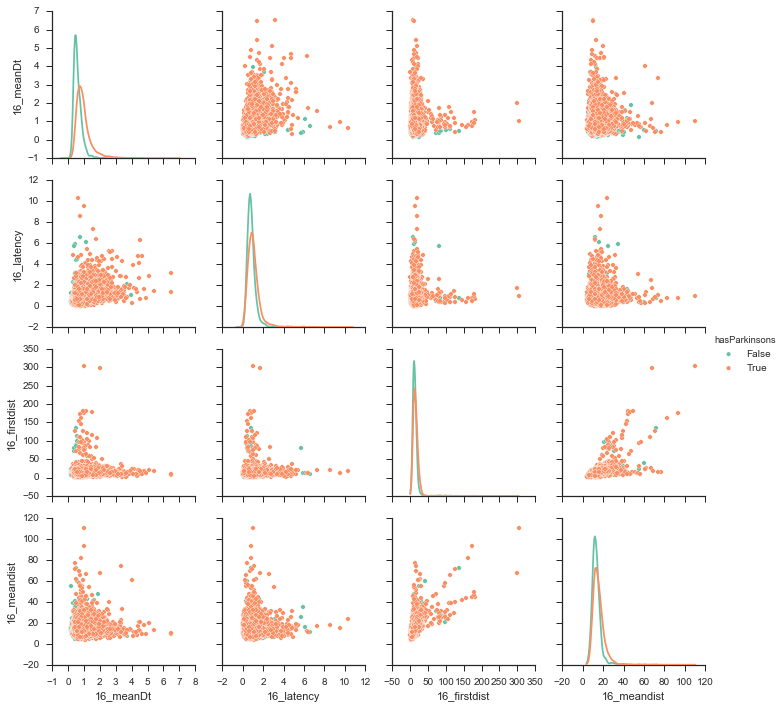

In [44]:
#featurestoPlot = ["age", "game_score", '9_gamescore', '9_latency', '9_meanDt', '9_firstdist', '9_meandist']
#features_df = data[["game_score",'16_gamescore','hasParkinsons']]
features_df = data[['16_meanDt','16_latency', '16_firstdist', '16_meandist', 'hasParkinsons']]
plotfeatures = ['16_meanDt','16_latency', '16_firstdist', '16_meandist']
features_df = mt.convert_features_to_numbers(features_df).dropna()
g = sns.pairplot(features_df, x_vars=plotfeatures,y_vars=plotfeatures,hue="hasParkinsons", palette="Set2", diag_kind="kde", markers="o")#, size=2.5)




SyntaxError: 'return' outside function (<ipython-input-45-8cf9cc0a5b62>, line 4)

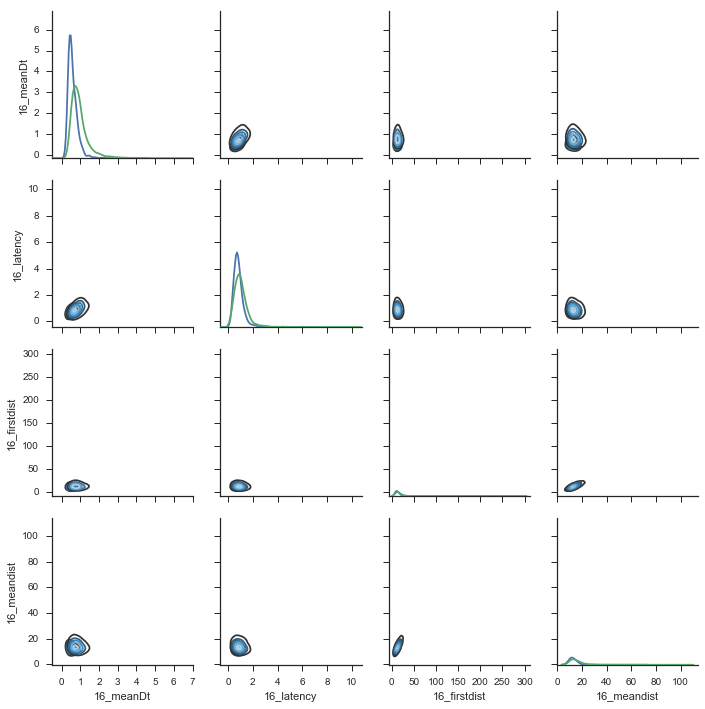

In [45]:
g = sns.PairGrid(features_df,x_vars=plotfeatures,y_vars=plotfeatures,hue="hasParkinsons")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)
return g

Features converted to numbers:

[]


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


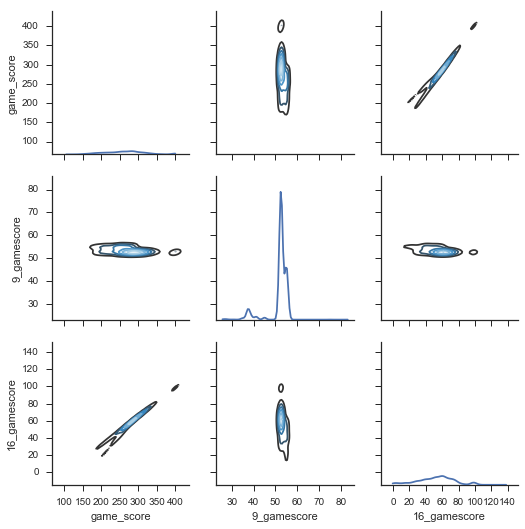

In [46]:
#featurestoPlot = ["age", "game_score", '9_gamescore', '9_latency', '9_meanDt', '9_firstdist', '9_meandist']
features_df = data[["game_score", '9_gamescore', '16_gamescore']]
features_df = mt.convert_features_to_numbers(features_df).dropna()
g = mt.squaregridhistplot(features_df)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0abe90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a076c90>]], dtype=object)

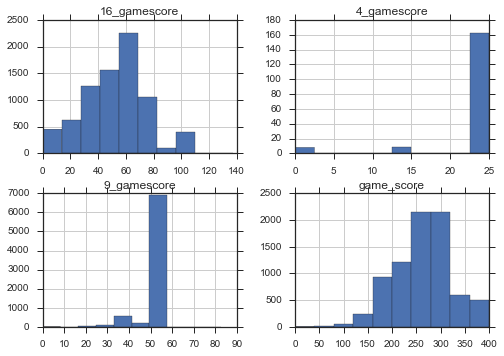

In [47]:
features_df = data[['4_gamescore', '9_gamescore', '16_gamescore', "game_score" ]]
features_df.hist()

Features converted to numbers:

[]


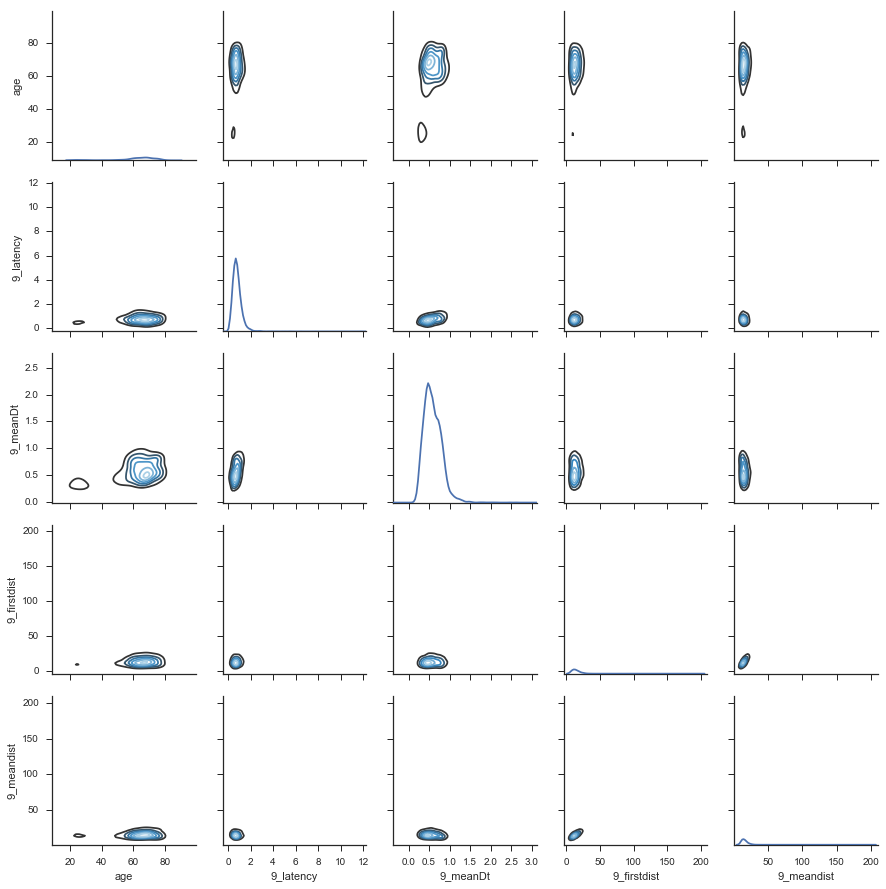

In [48]:
#featurestoPlot = ["age", "game_score", '9_gamescore', '9_latency', '9_meanDt', '9_firstdist', '9_meandist']
featurestoPlot = ["age", '9_latency', '9_meanDt', '9_firstdist', '9_meandist']
features_df = data[featurestoPlot]
features_df = mt.convert_features_to_numbers(features_df).dropna()
g = mt.squaregridhistplot(features_df)


In [245]:
# redo random forest with all game features.. 

##### define features:
demographicfeatures = ['gender','education','employment']
gamefeatures = [
    'game_numFails',
    'game_score',
    'game_numGames',
    '9_numsuccesses',
    '9_numunsuccesses',
    '9_meandist',
    '9_successful',
    '9_gamescore',
    '9_latency',
    '9_firstdist',
    '9_meanDt',
    '9_meansuccessfuldist',
    '16_firstdist',
    '16_meandist',
    '16_numsuccesses',
    '16_gamescore',
    '16_latency',
    '16_numunsuccesses',
    '16_successful',
    '16_meanDt',
    '16_meansuccessfuldist',
    '16_meanunsuccessfuldist']
confoundfeatures = ['smartphone','age']

features = gamefeatures
features.append('hasParkinsons')

labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod = RandomForestClassifier(n_estimators=100)
mod.fit(X_train, y_train)

###### assess performance:
mod.fit(X_train, y_train)
print 'training accuracy:', mod.score(X_train, y_train)
print 'test accuracy:', mod.score(X_test, y_test) 
mat = mod.predict_proba(X_test)
#print mat
# which features matter?
fi = mod.feature_importances_
mod.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

[]
training accuracy: 1.0
test accuracy: 0.850717703349
game_numGames              0.000220
9_numunsuccesses           0.002675
9_successful               0.002853
game_numFails              0.003755
9_numsuccesses             0.006433
9_gamescore                0.007157
16_successful              0.008737
16_numunsuccesses          0.009054
16_numsuccesses            0.026964
game_score                 0.028535
16_gamescore               0.028567
9_meandist                 0.052646
16_meanunsuccessfuldist    0.053884
9_meansuccessfuldist       0.054697
16_firstdist               0.055360
9_firstdist                0.056486
16_latency                 0.060586
16_meansuccessfuldist      0.063974
16_meandist                0.065247
9_latency                  0.067909
16_meanDt                  0.164222
9_meanDt                   0.180041
Name: feature importances, dtype: float64


In [ ]:
# pseudocode for hagai analysis:

In [ ]:
# split data by person and check on drugs vs not on drugs (what is predictive)

In [ ]:
# time series analysis of indiv. patients, looking at the yes and no data?

In [ ]:
# ttest of all features (including )

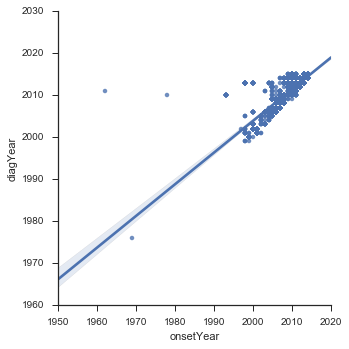

In [66]:
# correlation of onset year and diagnosis year
x='onsetYear'
y='diagYear'
d = data[[x, y]].dropna()
#sns.jointplot(x="onsetYear", y="diagYear", data=d, kind="kde")

lm = sns.lmplot(x,y,d)
#axes = lm.axes
#axes[0,0].set_ylim(1990,)
